**GRUPO A8**


Daniel Vidal


Marta Amores


Pablo Martos

In [ ]:
#Cargamos todas las librerías necesarias y nos aseguramos que estamos ejecutando la versión correcta
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2



# NUESTRA RED DE NEURONAS ARTIFICIALES

Debemos crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. El modelo debe de ser definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer **predicciones**.  

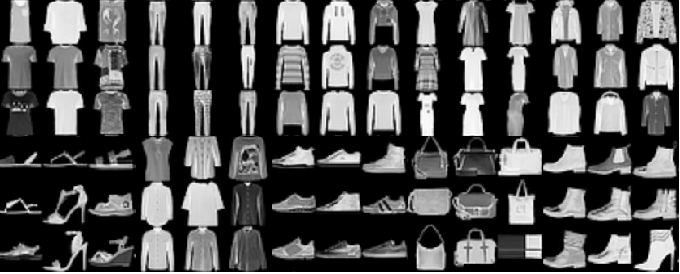



La clasificación va a ser la siguiente:

ETIQUETAS  | CLASES
-------------------|------------------
0| Camiseta/Top
1| Pantalones
2| Jersey
3| Vestido
4|Abrigo
5|Sandalia
6|Camisa
7|Deportivas
8|Mochila
9|Botines


In [ ]:
#Cargamos los datos en keras

from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
#Vamos a probar ver la matriz de una imagen en concreto
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[45]))

[[  0   0   0   1   0   0   0   0   0  34 148 202 107  84 162 198  90  26   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  21 107 166 168 152 204 238 248 237 190 142 178 158  98  17   0   0   0   0   0   0   0]
 [  0   0   0   1   0  55 188 140 131 121 119 116 146 157 132 115 136 125 140 143 181  51   0   0   0   0   0   0]
 [  0   0   0   0   0 167 134 113 130 134 140 132 125 125 131 135 130 133 131 115 135 163   6   0   0   0   0   0]
 [  0   0   0   0  58 148 133 124 134 128 135 128 133 130 133 137 138 130 124 130 133 147  82   0   1   0   0   0]
 [  0   0   0   0  86 148 158 139 124 120 131 134 132 134 124 134 132 137 126 137 136 146 114   0   0   0   0   0]
 [  0   0   0   0 112 141 174 143 117 134 130 128 131 136 134 128 128 131 106 187 149 147 143   0   0   0   0   0]
 [  0   0   0   0 134 151 167 154 114 134 138 139 135 135 130 130 124 129 119 229 141 145 164   0   0   0   0   0]
 [  0   0   0   0 136 154 169 157 109 147 140 137 137 136 142 141 139 129 123 20

Podemos intuir lo que puede ser, aun así podemos tener confusiones, vamos a ver que etiqueta le corresponde.

In [ ]:
train_labels[45]

2

En este caso estariamos hablando de la etiqueta dos, que nos corresponde a un jersey.

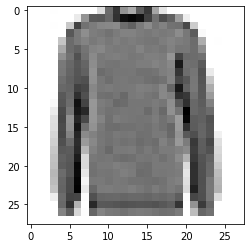

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[45]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Con la función matplotlib podemos apreciar mucho mejor de que clase estamos hablando.
Vamos a indicar la cantidad de caracteres que tenemos en nuestro vector de entrada.

In [ ]:
len(train_labels)


60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Veamos nuestro vector, los números son las etiquetas asociadas a las clases.
Por ejemplo, vemos que el primer elemento es la etiqueta 9, es decir, botines, veamoslo con la función matplotlib.

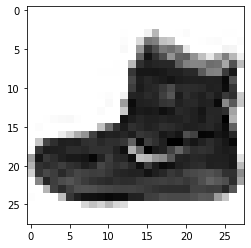

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Hasta aquí hemos visto nuestros **datos de entrenamiento**, veamos nuestros **datos de prueba**.

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

Veamos nuestros datos de prueba, por ejemplo, el índice dos a que etiqueta y clase corresponde.

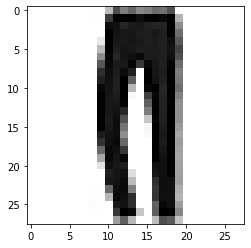

In [ ]:
import matplotlib.pyplot as plt
digit = test_images[2]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# CONSTRUIMOS LA RNA

Vamos a empezar creando nuestra arquitectura de la red. Para analizar las diferentes funciones de activación y el optimizador vamos a crear diferentes arquitecturas, en este caso crearemos 8 casos diferentes. 


Vamos a crear un tipo de red **secuencial**, que como ya sabemos, se define a crear el modelo capa por capa, donde cada capa tiene un tensor de entrada y uno de salida.
Si investigamos un poco más, en Keras tenemos otros tipos para construir nuestro modelo de aprendizaje. La API funcional nos permite crear modelos más complejos, con múltiples entradas y salidas, existe también la API subclase, que está lo que nos permite es crear un modelo personalizable que permite implementar casi cualquier modelo que queramos. 

## PRIMER CASO

Para nuestro primer caso vamos a crear dos capas Dense, es decir, que esten densamente conectadas. Para la capa de entrada estaran 10 neuronas conectadas con los 784 píxeles.
Nuestra capa de salida va a ser de 10 neuronas.

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(10, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se implementa la función *summary()* para comprobar la arquitectura del modelo. 
El total de parámetros es la suma de 7850 parámetros de la primera capa (Dense) y 110 de la segunda (Dense_1). La primera capa necesita 784 parámetros, 784 x 10 para almacenar los pesos de las neuronas, más 10 del sesgo, entonces 7850. Para la segunda capa, se desean concetar 10 nodos con los 10 de la capa anterior (esto pasa por ser la función softmax), más 10 del sesgo, entonces 110.

Antes de seguir con el entrenamiento vamos a conocer las diversas opciones que tiene keras para la **inicialización de los pesos**. Aparte que también podemos personalizar nuestra propia inicialización de los pesos.

Esta es muy importante para conseguir que nuestra red converja adecuadamente. (Tenemos una matriz de pesos con 784 entradas y 10 salidas)
* Random Normal Class: donde se utiliza la distribución normal. Con argumentos como la media, la desviación y la varianza.
* Random Uniform Class: genera tensores con la distribución uniforme. Creando un rango de valores aleatorios a generar (los números tienen la misma probabilidad de ser escogidos).
* Truncated Normal Class: utiliza la distribución normal truncada, similar a la distribución normal con la diferencia de que los valores con más de dos desviaciones de la media se descartan y vuelven a dibujarse.
* Zero Class: los tensores se inicalizan a 0.
* One Class: Los tensores se inicalizan a 1.
* Glorot Normal Class: (se utiliza por defecto cuando se usa el *framework* Keras), extrae muestras de una distribución normal truncada en 0.
* Glorot Uniform Class: extrae muestras de una distribución uniforme dentro de un límite. 
* He Normal Class: se define como el inicializador normal. 
* He Uniform Class: se define como el inicializador de escalado de varianza uniforme.
* Identity Class: el inicializador que genera la matriz de identidad.
* Orthogonal Class: el inicializador que genera una matriz ortogonal.
* Constant Class: el inicializador que genera tensores con valores constantes. 
* Variance Scaling Class: este inicializador es capaz de adaptar su escala a la forma de tensores de pesos. 


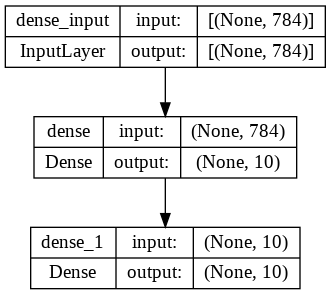

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

La función de perdida en nuestro caso va a ser **'categorical_crossentropy'**, esta es utilizada cuando hay más de dos resultados en la clasificación. El optimizador, podemos entender como un optimizador aquel que optimiza los valores de los parámetros para reducir el error, en este caso **'sgd'**, o también descenso del gradiente estocástico, definido como un algoritmo que minimiza la pérdida de un podelo predictivo respecto a los datos de entrenamiento. Y la métrica de precisión, **'accuracy'**.

In [ ]:
network.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Para facilitar que converja se normalizan los datos.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239
  255 216 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159
  108   0   0   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0
    0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0   0   0   0   0   0   0 171
  135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0   0   0   0   4 171 138 126 120 117 118 102 122
  145 111

In [ ]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255



Para las etiquetas utilizaremos, el one-hot encoding, este consiste en transformar las etiquetas en un vector de 0 (como etiquetas tengamos), y contiene el valor 1 en el índice de la etiqueta correspondiente.

In [ ]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Para entrenar nuestra red utilizamos la función *fit*.

In [ ]:
history= network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.7953 - accuracy: 0.7412
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5079 - accuracy: 0.8275
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4637 - accuracy: 0.8407
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4416 - accuracy: 0.8468
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4285 - accuracy: 0.8523


Podemos observar como nos indica el tiempo que ha tardado en ejecutar cada época, y nos resalta dos valores, la perdida y la precisión, donde nos indican el progreso del entrenamiento. 
Podemos observar como cada vez hay más precisión en acertar la etiqueta, aunque igual podemos aumentar el número de épocas para que la precisión sea casi del 100%.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4609 - accuracy: 0.8424


In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.46091392636299133
test_acc: 0.8424000144004822


Sin embargo, oberservamos que los datos de prueba son más bajos, aunque no es un valor muy diferente hay que vigilar no sobreentrenar nuestra red. Este valor puede ser un poco más bajo ya que estos datos no se han utilizado para el entrenamiento, entonces la precisión suele ser peor siempre con datos nuevos.

A continuación, usaremos esta capa para hacer predicciones sobre la 6ª imagen de test (***test_images[5]***) 

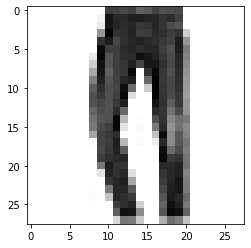

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#vemos que es un pantalón es decir, el valor 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 0s 1ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.99999976
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.   0.   0.   ... 0.13 0.01 0.69]
 [0.   0.   0.94 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.07 0.   0.   ... 0.   0.87 0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.04 0.03 0.  ]]


Por tanto, desde la primera capa la red neuronal lo identifica perfectamente que es un pantalón

Hay algunos métodos que nos ayudan a interpretar si nuestro modelo se comporta bien, y ver que clases pueden ser confundidas con otras. Para eso vamos a graficar la matriz de confusión. 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0.   0.   0.   0.   0.   0.18 0.   0.13 0.01 0.69]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[876   2   6  37   6   1  49   0  22   1]
 [  7 962   4  21   4   0   0   0   2   0]
 [ 32   8 697   9 159   1  81   0  13   0]
 [ 48  19   8 847  30   0  40   0   8   0]
 [  1   5  81  30 788   3  82   0  10   0]
 [  1   0   0   1   0 941   0  32   5  20]
 [214   2 102  26 100   2 519   0  35   0]
 [  0   0   0   0   0  56   0 896   0  48]
 [  6   2   3   9   4   5   8   5 958   0]
 [  2   0   0   0   0  22   0  35   1 940]]
=PINTAMOS LA MATRIZ DE CONFUSION==================================

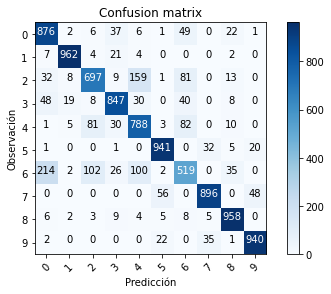

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

La diagonal principal de esta matriz define los valores correctos, es decir, ha averiguado 852 veces correctamente una camiseta. 
Aunque podemos ver que algunas clases las diferencia muy bien, como por ejemplo, la etiqueta uno que corresponde a los pantalones y la etiqueta 9 que son los botines. Sin embargo, obervamos la etiqueta 6 que corresponde a una camisa, la a confundido 198 veces con una camiseta, lógico.
Eso nos puede dar a pensar que podríamos meterle más épocas de entrenamiento para observar si este valor cambia, ya que aún le cuesta diferenciar las clases más parecidas. 
Vamos a sumar todos los números de la diagonal para tener un indicador y poder comparar con los diferentes casos. La **suma de los componentes de la diagonal principal son: 8418.**

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


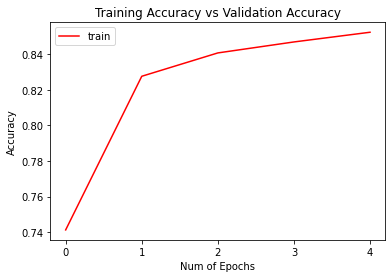

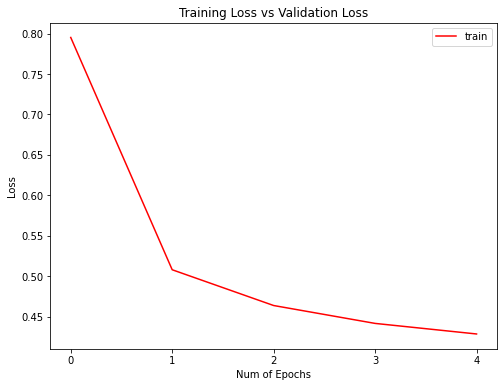

In [ ]:
plt.figure(0)  
plt.plot(history.history['accuracy'],'r')  

plt.xticks(np.arange(0, 5, 1.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history.history['loss'],'r')  

plt.xticks(np.arange(0, 5, 1.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

# SEGUNDO CASO

Para nuestro segundo caso vamos a seguir con las mismas neuronas de entrada, es decir, con las de la primera capa (10). La función de activación tampoco va a variar (relu). Vamos a cambiar nuestro optimizador a 'rmsprop'


In [ ]:
network = models.Sequential()

network.add(layers.Dense(10, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se implementa la función *summary()* para comprobar la arquitectura del modelo. 
El total de parámetros es la suma de 7850 parámetros de la primera capa  y 110 de la segunda . La primera capa necesita 784 parámetros, 784 x 10 para almacenar los pesos de las neuronas, más 10 del sesgo, entonces 7850. Para la segunda capa, se desean concetar 10 nodos con los 10 de la capa anterior (esto pasa por ser la función softmax), más 10 del sesgo, entonces 110.

In [ ]:
network.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Podemos empezar a decir que nuestro modelo dos trabaja peor que el primer caso, observamos que los datos de pérdida ya son más altos, no baja del 50%, sin embargo, con las 5 épocas de entrenamiento ha conseguido una precisión del 80% aproximadamente. 

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.3583 - accuracy: 0.1011


In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 2.3582749366760254
test_acc: 0.10109999775886536


Como podemos comprobar,la precisión es mas bajo que la que tenemos en el entrenamiento debido a que le hemos planteado nuevas imagenes. También es mas baja respecto a la precisión que obtuvimos en el primer caso 

A continuación, usaremos esta capa para hacer predicciones sobre la 6ª imagen de test (***test_images[5]***)

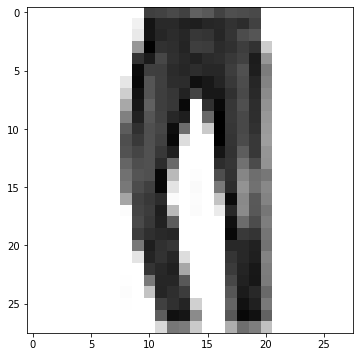

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#vemos que es un pantalón es decir, el valor 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 0s 1ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.11 0.04 0.16 0.13 0.11 0.09 0.2  0.07 0.04 0.06]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
6
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
1.0
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.07 0.07 0.1  ... 0.1  0.09 0.1 ]
 [0.05 0.02 0.07 ... 0.06 0.04 0.06]
 [0.1  0.05 0.15 ... 0.07 0.06 0.07]
 ...
 [0.09 0.08 0.08 ... 0.11 0.1  0.07]
 [0.09 0.06 0.12 ... 0.08 0.08 0.1 ]
 [0.08 0.07 0.09 ... 0.08 0.11 0.08]]


Por tanto, desde la segunda capa la red neuronal lo identifica perfectamente que es un pantalón

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0.07 0.07 0.1  0.08 0.13 0.09 0.16 0.1  0.09 0.1 ]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[6 6 6 ... 6 4 6]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[  1   0   2   0 338   4 655   0   0   0]
 [  0   0   8   0 491   2 499   0   0   0]
 [  0   0   0   0 261   2 737   0   0   0]
 [  0   0   1   1 421  14 563   0   0   0]
 [  0   0   0   0 290   0 710   0   0   0]
 [  1   0   0   9  89  28 864   2   7   0]
 [  0   0   2   0 304   4 690   0   0   0]
 [  0   0   0   2 104  11 883   0   0   0]
 [  0   1   0   0 169  23 806   0   1   0]
 [  0   0   0   0   6   0 994   0   0   0]]
=PINTAMOS LA MATRIZ DE CONFUSION==================================

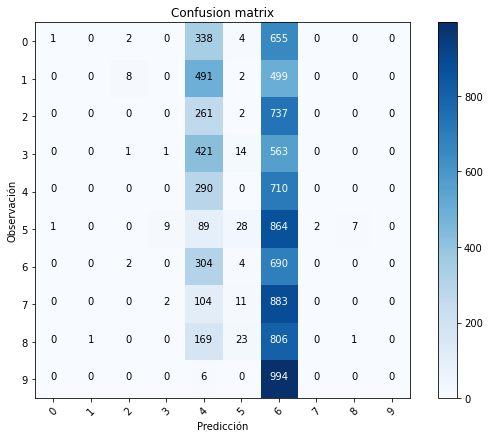

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

Si sumamos **los componentes de nuestra diagonal principal, ha conseguido acertar 8013.** El modelo de entrenamiento digue teniendo problemas para diferenciar clases muy parecidas, pero en este segundo caso sin embargo ha tenido más datos erróneos que en el anterior, por ejemplo, cuando era una sandalia él lo ha catalogado 115 veces como una deportiva, errores que en el modelo anterior no se cometian.

# TERCER CASO

Para nuestro tercer caso, vamos a utilizar 10 neuronas en la primera capa, con una función de activación diferente, en este caso la *sigmoid*, y con el optimizador *'sgd'*.

In [ ]:
network = models.Sequential()

network.add(layers.Dense(10, activation='sigmoid',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se implementa la función summary() para comprobar la arquitectura del modelo. El total de parámetros es la suma de 7850 parámetros de la primera capa y 110 de la segunda . La primera capa necesita 784 parámetros, 784 x 10 para almacenar los pesos de las neuronas, más 10 del sesgo, entonces 7850. Para la segunda capa, se desean concetar 10 nodos con los 10 de la capa anterior (esto pasa por ser la función softmax), más 10 del sesgo, entonces 110.

In [ ]:
network.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: ignored

Con dichos números vemos que estamos frente a un modelo de entrenamiento que no es acepatable, aunque la pérdida no baja a valores pequeños (tampoco lo hace a grandes cantidades), vemos que tiene un porcentaje muy alto de ella, necesitaría bastantes épocas para reducir ese número. Por otro lado la precisión tampoco es buena. 
Más tarde lo veremos mejor con la matriz de confusión.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Como podemos comprobar, al igual que en los anteriores 2 casos, la precision es mas baja que en los entrenamientos previos sin embargo en este modelo podemos comprobar que es mucho mas baja comparada al resto de casos y demasiado baja como para poder ser considerada como una forma valida con tan solo 63.6% de precisión. 

A continuación, usaremos esta capa para hacer predicciones sobre la 6ª imagen de test (***test_images[5]***) 

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#vemos que es un pantalón es decir, el valor 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

Es decir, desde esta capa identifica perfectamente que la imagen es un pantalón

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

**La suma de los componentes de la diagonal principal es: 6420.** Como ya hemos podido deducir antes, los números son muy bajos, vemos que solo ha podido acertar 75 sandalias, y tiene errores de hasta 471. 
Entonces podemos decidir que no es un buen modelo de entrenamiento. 

# CUARTO CASO

In [ ]:
network = models.Sequential()

network.add(layers.Dense(10, activation='sigmoid',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Se implementa la función summary() para comprobar la arquitectura del modelo. El total de parámetros es la suma de 7850 parámetros de la primera capa y 110 de la segunda . La primera capa necesita 784 parámetros, 784 x 10 para almacenar los pesos de las neuronas, más 10 del sesgo, entonces 7850. Para la segunda capa, se desean concetar 10 nodos con los 10 de la capa anterior (esto pasa por ser la función softmax), más 10 del sesgo, entonces 110.

In [ ]:
network.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

En el cuarto caso, la pérdida disminuye hasta un 50%, la precisión casi llega al 85% podemos decir que es una precisión aceptable.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

A pesar de que la precisión es aproximadamente un 1% mas baja que en el entrenamiento, podemos comprobar que es un metodo mucho mas fiable que los anteriores casos aunque queda lejos de la precisión buscada.

A continuación, usaremos esta capa para hacer predicciones sobre la 6ª imagen de test (***test_images[5]***) 

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#vemos que es un pantalón es decir, el valor 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

En esta capa es predecido correctamente que la imagen es un pantalón

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

**La suma de los componentes de la diagonal principal es: 8231.** Hay algunos casos donde sigue confundiendo clases, como la camiseta y la camisa, como hemos podido observar en los casos anteriores este problema se repite, ya que el número de épocas no deja que estos casos acierten, la camisa y la camiseta son muy similares. 


Veámos las clases que más le cuesta diferenciar, la etiqueta 0 y la etiqueta 6.

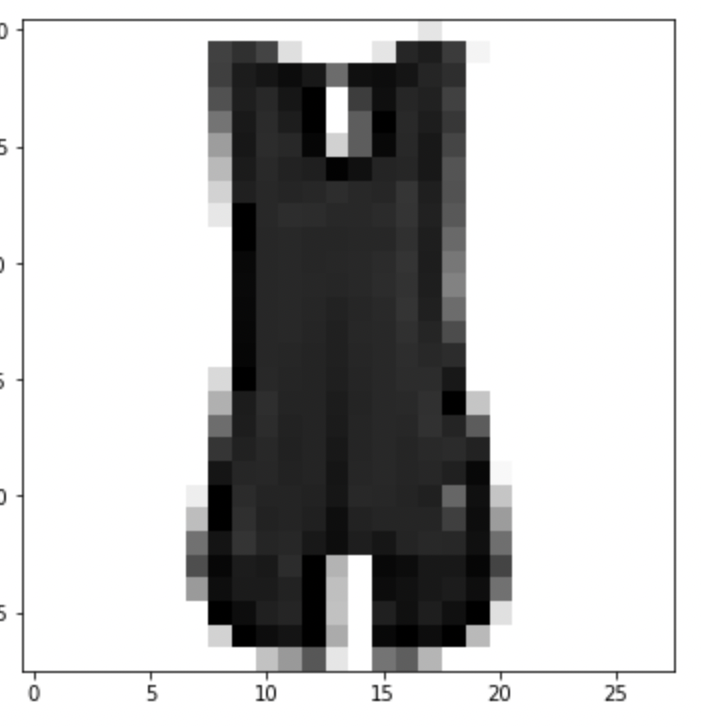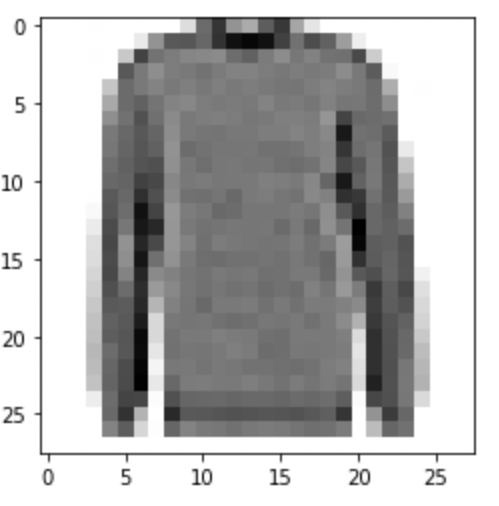

# QUINTO CASO

Hasta ahora hemos concluido que, las épocas no dejaban que el modelo se entrenase debidamente, hasta en algunos casos hemos dicho que no ha sido un buen modelo de entrenamiento, ahora vamos a combiar el número de capas de entrada, y observaremos las diferencias.


El quinto caso se trata de aumentar las capas de la primera entrada a 512, utilizando la función de activación relu, con el optimizador 'sgd'.



In [ ]:
network = models.Sequential()

network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Se implementa la función summary() para comprobar la arquitectura del modelo. El total de parámetros es la suma de 407050 parámetros de la primera capa y 5130 de la segunda . La primera capa necesita 784 parámetros, 784 x 512 para almacenar los pesos de las neuronas, más 512 del sesgo, entonces 401920. Para la segunda capa, se desean concetar 10 nodos con los 512 de la capa anterior (esto pasa por ser la función softmax), más 10 del sesgo, entonces 5130.

In [ ]:
network.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

A nuestro parecer, no hemos encontrado muchas diferncias al cambiar los números de la primera capa, la precisión es de casi el 85% es decir, relativamente buena, aún así la pérdida no ha sido la esperada. 

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Como podemos comprobar este metodo nos aplica practicamente la misma precision que el modelo anterior por lo que debemos decir que son 2 modelos bastante similares en cuanto a nivel de fiabilidad


A continuación, usaremos esta capa para hacer predicciones sobre la 6ª imagen de test (test_images[5])

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#vemos que es un pantalón es decir, el valor 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

En esta capa identifica perfectamente que el elemento 6 es un pantalón

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

La **suma de los componentes de la diagonal principal es de: 8229.** Así que podemos asumir que, almenos con las 5 épocas, cambiar el número de neuronas de la primera capa apenas se nota la diferencia, seguimos con los probleas de algunas de las etiquetas. 

# SEXTO CASO

En el sexto caso vamos a seguir con 512 neuronas en la capa de entrada, con una función de activación relu, y con el otpimizador 'rmsprop'. 

In [ ]:
network = models.Sequential()

network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Se implementa la función summary() para comprobar la arquitectura del modelo. El total de parámetros es la suma de 407050 parámetros de la primera capa y 5130 de la segunda . La primera capa necesita 784 parámetros, 784 x 512 para almacenar los pesos de las neuronas, más 512 del sesgo, entonces 401920. Para la segunda capa, se desean concetar 10 nodos con los 512 de la capa anterior (esto pasa por ser la función softmax), más 10 del sesgo, entonces 5130.

In [ ]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

La precisión pasa del 85%, la consideramos aceptable, la pérdida en este caso a disminuido notablemente, estamos por debajo de los casos anteriores, con la matriz de confusión vamos a ver como ha ido.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

En el siguiente paso comprobaremos si predice correctamente la 6ª imagen (***test_images[5]***)

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#vemos que es un pantalón es decir, el valor 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

Una vez más, la capa adivina correctamente que es un pantalón 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

La **suma de los componentes de la diagonal principal es de: 8571.** La suma de los componentes ha aumentado, pero no sobrepasa mucho los valores. Una cosa a destacar esque ha confundido 302, cuando era un abrigo ha dicho que era un jersey, es decir, se ha confundido muchas veces. 

# SÉPTIMO CASO

El séptimo caso seguimos con las 512 capas de entrada, seguidos de una función de activación sigmoid con el optimizador 'sgd'.

In [ ]:
network = models.Sequential()

network.add(layers.Dense(512, activation='sigmoid',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Se implementa la función summary() para comprobar la arquitectura del modelo. El total de parámetros es la suma de 407050 parámetros de la primera capa y 5130 de la segunda . La primera capa necesita 784 parámetros, 784 x 512 para almacenar los pesos de las neuronas, más 512 del sesgo, entonces 401920. Para la segunda capa, se desean concetar 10 nodos con los 512 de la capa anterior (esto pasa por ser la función softmax), más 10 del sesgo, entonces 5130.

In [ ]:
network.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

No nos parece aceptable este modelo de entrenamiento, la pérdida tiene valores muy altos y esto no nos interesa, no ha aprendido debidamente y va a tener muchos problemas para los datos de test. La precisión no es del todo mala, pero acompañada con la pérdida no nos interesa.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

En el siguiente paso, vamos a hacer predicciones de la 6ª imagen de test(***test_images[5]***)

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#vemos que es un pantalón es decir, el valor 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

En esta capa, también lo adivina correctamente que es un pantalón

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

Ya podemos observar la matriz de confusión, en la diagonal principal aparecen números muy bajos, hay muchas etiquetas que han sido confundidas con otras, por ejemplo la camisa. 
Este modelo de entrenamiento no ha sido aceptado.

# OCTAVO PASO

En nuestro último caso se ha utilizado la función de activación sigmoid con el optimizador 'rmsprop', y con 512 capas de entrada.

Después de obersvar el séptimo caso, vamos a ver si con un optimizador diferente, que vemos que es aquel que reduce el error cometido por la red, nos ayuda a hacer mejor nuestro modelo. 

In [ ]:
network = models.Sequential()

network.add(layers.Dense(512, activation='sigmoid',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Se implementa la función summary() para comprobar la arquitectura del modelo. El total de parámetros es la suma de 407050 parámetros de la primera capa y 5130 de la segunda . La primera capa necesita 784 parámetros, 784 x 512 para almacenar los pesos de las neuronas, más 512 del sesgo, entonces 401920. Para la segunda capa, se desean concetar 10 nodos con los 512 de la capa anterior (esto pasa por ser la función softmax), más 10 del sesgo, entonces 5130.

In [ ]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Observamos un cambio, los valores son mucho más positivos, la pérdida baja y la precisión casi es del 90%.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Finalmente, haremos la ultima predicción de la 6ª imagen de test (***test_images[5]***)

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#vemos que es un pantalón es decir, el valor 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

Finalmente, podemos decir que en todas las capas predijo que era un pantalón correctamente

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

Tiene altos valores en la diagonal principal y eso nos interesa. Aun así seguimos teniendo problemas con algunas etiquetas.

## Jugamos con nuestros modelos

Ahora que pasaría si a los casos le